<a href="https://colab.research.google.com/github/Taniyachouhaniitm/Potato-disease/blob/main/Potato_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/Deep_learning/Potato_disease_detection/PlantVillage'


In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                    shuffle= True,
                                                    image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

In [ ]:
for image_batch, labels_batch in dataset.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())


(32, 256, 256, 3)
[1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 2 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0]


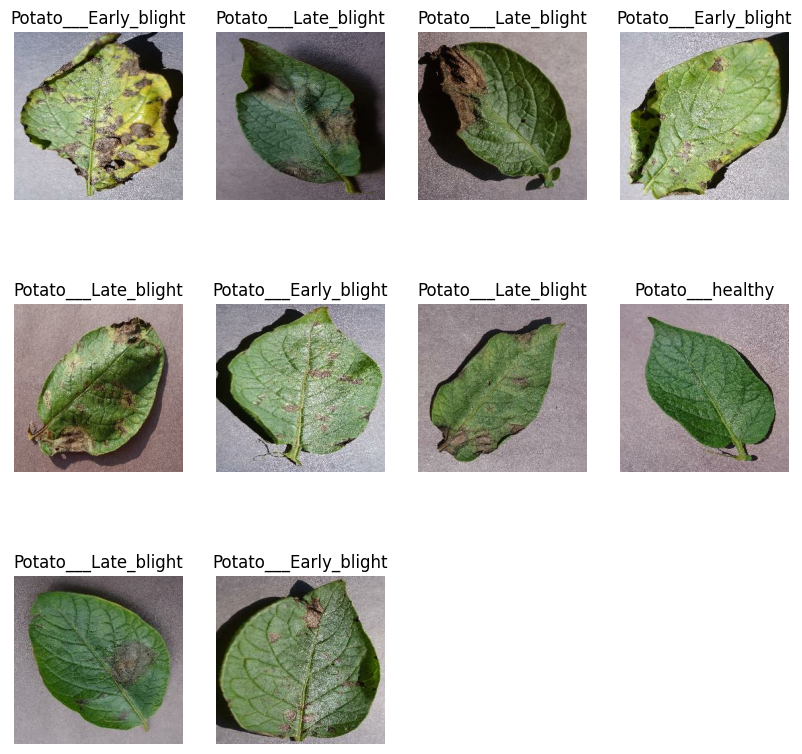

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
  for i in range(10):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")

## Taking 0.8 for training, 0.1 for validation and 0.1 for testing

In [ ]:
train_dataset= dataset.take(54)
len(train_dataset)

54

In [ ]:
test_dataset=dataset.skip(54)
len(test_dataset)

14

In [ ]:
validation_dataset=test_dataset.take(6)
len(validation_dataset)

6

In [ ]:
test_dataset=test_dataset.skip(6)
len(test_dataset)

8

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle= True, shuffle_size=10000):
  ds_size=len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)
  test_size=int(test_split*ds_size)

  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)
  return train_ds, val_ds, test_ds

In [ ]:
train_data, val_data, test_data= get_dataset_partitions_tf(dataset)

In [ ]:
len(train_data)

54

In [ ]:
len(val_data)

6

In [ ]:
len(test_data)

8

In [ ]:
train_data =train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data =val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data =test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])
